# Doctor Visit Analysis Using Python

In [1]:
# Importing Required Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [22]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl (9.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Vicky\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [2]:
!python -m pip show scikit-learn

Name: scikit-learn


Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\vicky\appdata\local\programs\python\python310\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, lazypredict, lightgbm


In [23]:
# Reading The Dataset

df = pd.read_csv("DoctorVisits.csv")

In [24]:
print(df.head())

   Unnamed: 0  visits  gender   age  income  illness  reduced  health private  \
0           1       1  female  0.19    0.55        1        4       1     yes   
1           2       1  female  0.19    0.45        1        2       1     yes   
2           3       1    male  0.19    0.90        3        0       0      no   
3           4       1    male  0.19    0.15        1        0       0      no   
4           5       1    male  0.19    0.45        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no  


In [25]:
# Converting gender column from string to number using labelencoder

from sklearn.preprocessing import LabelEncoder

data = df['gender']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Use LabelEncoder to transform the 'Gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

# The 'Gender' column is now converted to numeric values
print(df)


      Unnamed: 0  visits  gender   age  income  illness  reduced  health  \
0              1       1       0  0.19    0.55        1        4       1   
1              2       1       0  0.19    0.45        1        2       1   
2              3       1       1  0.19    0.90        3        0       0   
3              4       1       1  0.19    0.15        1        0       0   
4              5       1       1  0.19    0.45        2        5       1   
...          ...     ...     ...   ...     ...      ...      ...     ...   
5185        5186       0       0  0.22    0.55        0        0       0   
5186        5187       0       1  0.27    1.30        0        0       1   
5187        5188       0       0  0.37    0.25        1        0       1   
5188        5189       0       0  0.52    0.65        0        0       0   
5189        5190       0       1  0.72    0.25        0        0       0   

     private freepoor freerepat nchronic lchronic  
0        yes       no        no    

In [26]:
# Display complete information about the columns of the dataset

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   int32  
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 507.0+ KB
None


In [28]:
# Find out the total number of people based on their count of illness

print(df["health"].value_counts())


0     3026
1      823
2      446
3      273
4      187
5      132
6      104
7       61
8       42
9       32
11      24
10      21
12      19
Name: health, dtype: int64


In [29]:
# Find out the number of males and females affected by illness

print(df["gender"].value_counts())


0    2702
1    2488
Name: gender, dtype: int64


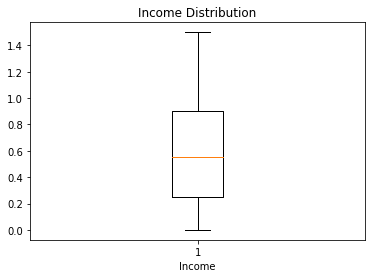

In [30]:
# Visualize and analyze the maximum, minimum, and median income

plt.boxplot(df["income"])
plt.xlabel("Income")
plt.title("Income Distribution")
plt.show()


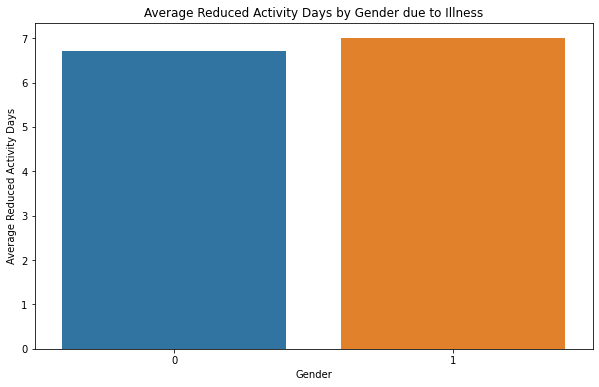

In [31]:
# Analyze the number of days of reduced activity for males and females separately due to illness

reduced_activity_by_gender = df.groupby(["gender", "reduced"]).mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='reduced', data=reduced_activity_by_gender, ci=None)
plt.xlabel('Gender')
plt.ylabel('Average Reduced Activity Days')
plt.title('Average Reduced Activity Days by Gender due to Illness')
plt.show()


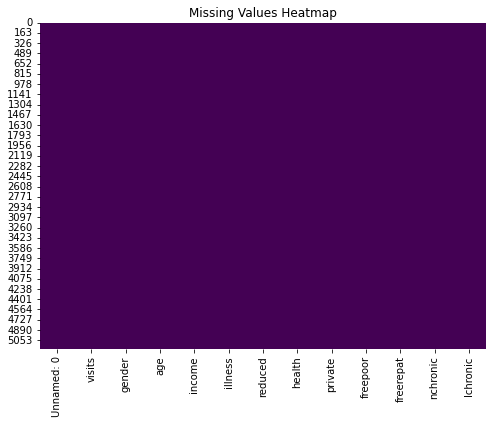

In [32]:
# Visualize if there are any missing values in the dataset based on a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


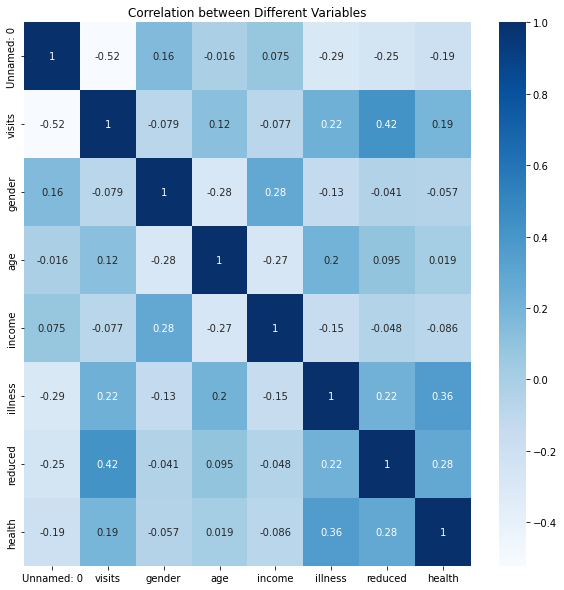

In [36]:
# Find out the correlation between variables in the given dataset

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap="Blues" )
plt.title("Correlation between Different Variables")
plt.show()


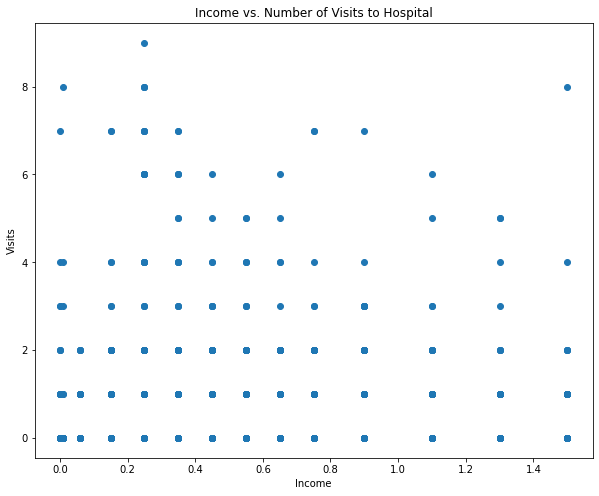

In [42]:
# Analyze how the income of a patient affects the number of visits to the hospital

plt.figure(figsize=(10, 8))
plt.scatter(x="income", y="visits", data=df)
plt.xlabel("Income")
plt.ylabel("Visits")
plt.title("Income vs. Number of Visits to Hospital")
plt.show()


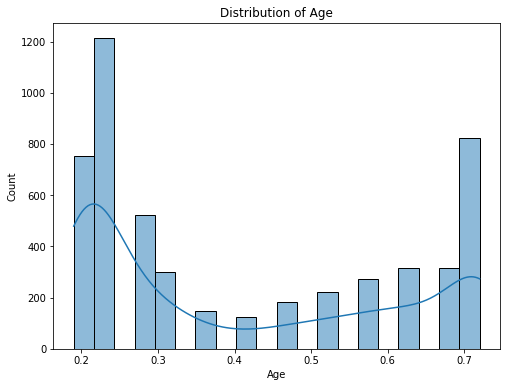

In [43]:
# Analyze the age distribution of patients

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


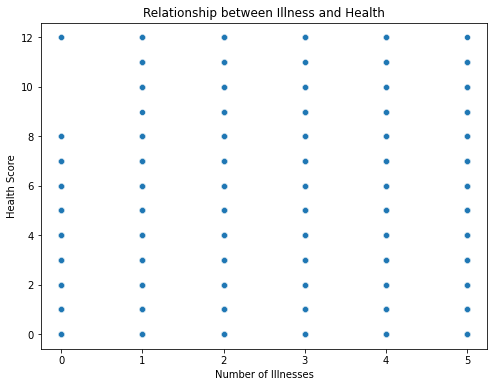

In [44]:
# Relationship between Illness and Health

plt.figure(figsize=(8, 6))
sns.scatterplot(x='illness', y='health', data=df)
plt.xlabel('Number of Illnesses')
plt.ylabel('Health Score')
plt.title('Relationship between Illness and Health')
plt.show()


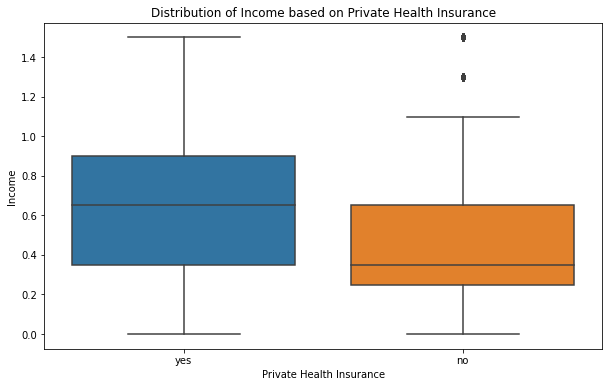

In [45]:
# Private Insurance vs. Income

plt.figure(figsize=(10, 6))
sns.boxplot(x='private', y='income', data=df)
plt.xlabel('Private Health Insurance')
plt.ylabel('Income')
plt.title('Distribution of Income based on Private Health Insurance')
plt.show()


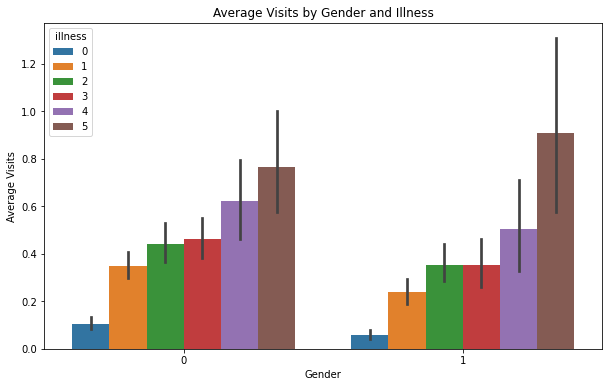

In [48]:
# Compare Visits by Gender and Illness

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='visits', hue='illness', data=df)
plt.xlabel('Gender')
plt.ylabel('Average Visits')
plt.title('Average Visits by Gender and Illness')
plt.show()


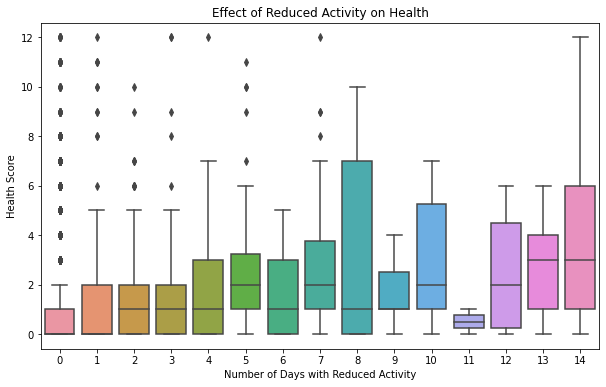

In [49]:
# Effect of Reduced Activity on Health

plt.figure(figsize=(10, 6))
sns.boxplot(x='reduced', y='health', data=df)
plt.xlabel('Number of Days with Reduced Activity')
plt.ylabel('Health Score')
plt.title('Effect of Reduced Activity on Health')
plt.show()


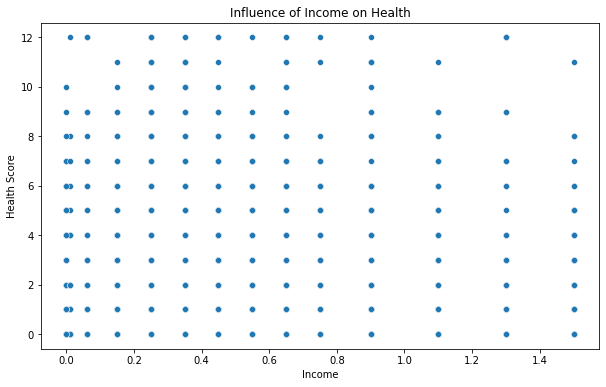

In [50]:
# Influence of Income on Health

plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='health', data=df)
plt.xlabel('Income')
plt.ylabel('Health Score')
plt.title('Influence of Income on Health')
plt.show()


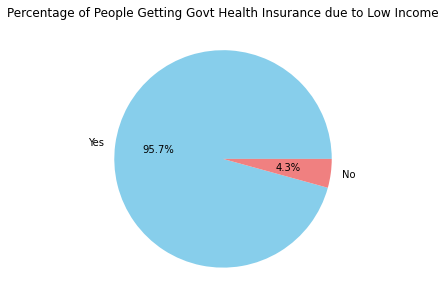

In [51]:
# Percentage of people getting government health insurance due to low income

labels = ["Yes", "No"]
govt_insurance_low_income = df["freepoor"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(govt_insurance_low_income, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Percentage of People Getting Govt Health Insurance due to Low Income")
plt.show()


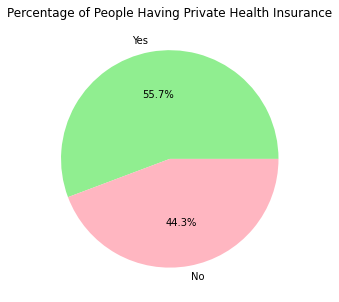

In [52]:
# Percentage of people having private health insurance

private_insurance = df["private"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(private_insurance, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])
plt.title("Percentage of People Having Private Health Insurance")
plt.show()


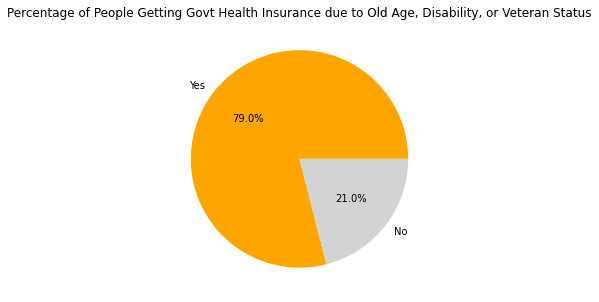

In [58]:
# Percentage of people getting government health insurance due to old age, disability, or veteran status

govt_insurance_old_age = df["freerepat"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(govt_insurance_old_age, labels=labels, autopct='%1.1f%%', colors=['orange', 'lightgrey'])
plt.title("Percentage of People Getting Govt Health Insurance due to Old Age, Disability, or Veteran Status")
plt.show()